# Aim : To build a model which would predict  the prices of the flights using various input features.

Dataset downloaded from Kaggle https://www.kaggle.com/nikhilmittal/flight-fare-prediction-mh/
There are two datasets: training set and test set. The training set contains some features, along with the prices of the flights.

### Steps involved
1. Exploratory Data Analysis
2.Feature Engineering
3.Feature Selection
4.Model Deployment

In [1]:
#importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# analysing training dataset

In [3]:
training_df = pd.read_excel('Data_Train.xlsx')
training_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
training_df.shape

(10683, 11)

So, we have 10683 rows and 11 columns in our training dataset.

In [5]:
training_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [6]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


We have a total of 11 features out of which 1 seems to be integer while others are objects.

In [7]:
#checking for null values

In [8]:
training_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

### Data Cleaning

In [9]:
#making a copy of the data for cleaning purpose

In [10]:
train_data = training_df.copy()
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Observations:
1. Route feature contains a list of cities which we will need to separate
2. Arrival time feature has dates attached along with , which we need to separate
3. The duration, date of journey features are in string format which we need to convert into integer.
4. Total stops feature has word stop along with the number of stops.
5. Departure time and duration features has to be converted into  integer type

### Data Analysis
1. Missing Values
2. Numerical Variables and their Distribution
3. Categorical Variables
4. Outliers
5. Relation between dependent and independent variables.

In [17]:
#checking for duplicate values
train_data.duplicated().sum()

0

In [18]:
#dropping null values
train_data.dropna(inplace=True)

In [19]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

So, we have got rid of null as well as duplicate values

### checking individual categories in each feature

In [22]:
train_data['Airline'].value_counts().count()

12

In [23]:
#there are 12 service providers
train_data['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [24]:
train_data['Destination'].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [25]:
train_data['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1536
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [26]:
train_data['Route'].value_counts().count()

128

In [27]:
train_data['Source'].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [28]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

Maximum 4 stops are there and minimum of 0

In [29]:
#converting into date and time

In [30]:
train_data['Dep_Time']=pd.to_datetime(train_data['Dep_Time'])
train_data['Arrival_Time']=pd.to_datetime(train_data['Arrival_Time'])

In [32]:
train_data['Duration']=train_data['Duration'].str.replace('h','')
train_data['Duration']=train_data['Duration'].str.replace('m','')

In [33]:
#Splitting hours and mins into two columns
train_data[['Duration_hours','Duration_mins']]=train_data.Duration.str.split(" ",expand = True)

In [34]:
#filling 0 in place of missing values
train_data.Duration_mins.fillna(0,inplace = True)

In [51]:
#dropping Duration feature as it is not required anymore
train_data.drop(['Duration'], axis = 1, inplace = True)

In [36]:
#converting the data type
train_data["Duration_hours"]=train_data['Duration_hours'].astype('float')
train_data["Duration_mins"]=train_data['Duration_mins'].astype('float')

In [37]:
#calculation total time taken by the flight
train_data['Total_Duration'] = train_data['Duration_hours']+(train_data['Duration_mins']/60)

In [53]:
#dropping duration hours and mins as they are not required anymore
train_data.drop(['Duration_hours'],axis = 1,inplace= True)
train_data.drop(['Duration_mins'],axis = 1,inplace = True)

Above we observed that we have maximum of 4 stops. We need to remove the word stop and convert the data type into integer

In [39]:
train_data['Total_Stops'].replace('non-stop',0, inplace = True)

In [40]:
train_data[['Total_Stops','drop_this']]=train_data.Total_Stops.str.split(' ',expand=True)

In [55]:
train_data.drop(['drop_this'],axis = 1,inplace = True)

In [57]:
train_data['Total_Stops'].fillna(0,inplace=True)

In [58]:
train_data['Total_Stops']=train_data['Total_Stops'].astype('int')

In [60]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10462 non-null  object        
 1   Date_of_Journey  10462 non-null  object        
 2   Source           10462 non-null  object        
 3   Destination      10462 non-null  object        
 4   Route            10462 non-null  object        
 5   Dep_Time         10462 non-null  datetime64[ns]
 6   Arrival_Time     10462 non-null  datetime64[ns]
 7   Total_Stops      10462 non-null  int32         
 8   Additional_Info  10462 non-null  object        
 9   Price            10462 non-null  int64         
 10  Total_Duration   10462 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int32(1), int64(1), object(6)
memory usage: 1.2+ MB


Now we have 6 Categorical and 5 numerical features.

In [74]:
#Grouping Routes which are less than 1 percent of the total Routes to other category.
frequencies = train_data['Route'].value_counts(normalize = True)
mapping = train_data['Route'].map(frequencies)
train_data['Route']=train_data['Route'].mask(mapping<0.01,'other_')
train_data['Route'].value_counts()

DEL → BOM → COK          2376
other_                   1634
BLR → DEL                1536
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
CCU → DEL → BLR           565
BLR → BOM → DEL           402
MAA → CCU                 381
DEL → HYD → COK           326
DEL → BLR → COK           232
DEL → COK                 213
DEL → JAI → BOM → COK     183
DEL → MAA → COK           146
DEL → AMD → BOM → COK     144
Name: Route, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'BLR → DEL'),
  Text(1, 0, 'other_'),
  Text(2, 0, 'CCU → BLR'),
  Text(3, 0, 'BLR → BOM → DEL'),
  Text(4, 0, 'DEL → BOM → COK'),
  Text(5, 0, 'DEL → BLR → COK'),
  Text(6, 0, 'MAA → CCU'),
  Text(7, 0, 'CCU → BOM → BLR'),
  Text(8, 0, 'DEL → AMD → BOM → COK'),
  Text(9, 0, 'DEL → HYD → COK'),
  Text(10, 0, 'DEL → COK'),
  Text(11, 0, 'CCU → DEL → BLR'),
  Text(12, 0, 'DEL → MAA → COK'),
  Text(13, 0, 'BOM → HYD'),
  Text(14, 0, 'DEL → JAI → BOM → COK')])

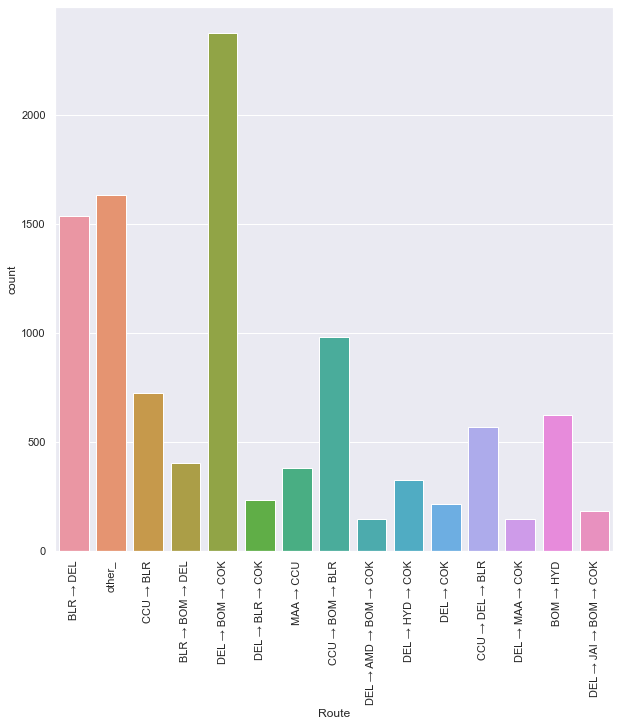

In [75]:
#Visualizing Route feature separately
sns.set(rc={'figure.figsize':(10,10)})
sns.countplot(data=train_data,x = train_data['Route'])
plt.xticks(rotation=90)

In [78]:
#unovariate analysis of categorical data
cat_col = train_data.select_dtypes(include=['object']).columns

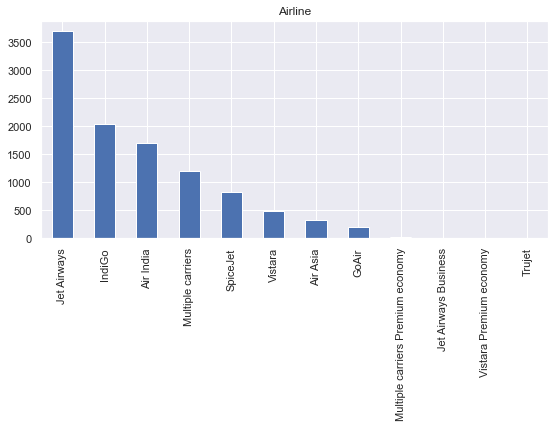

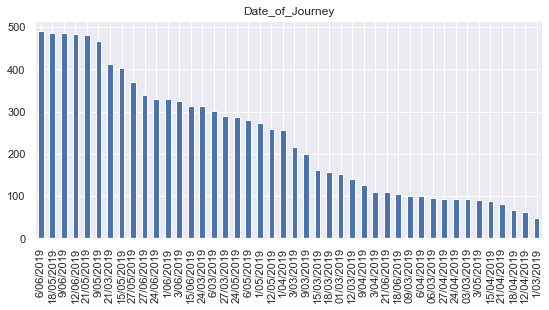

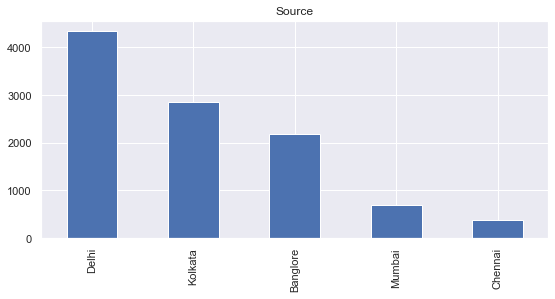

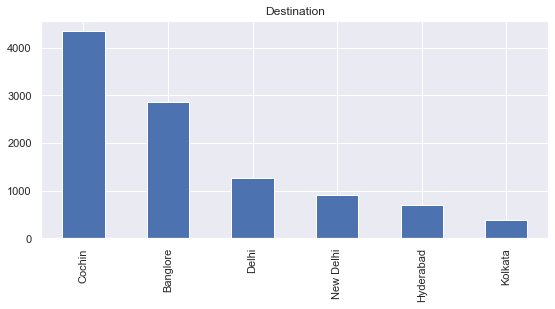

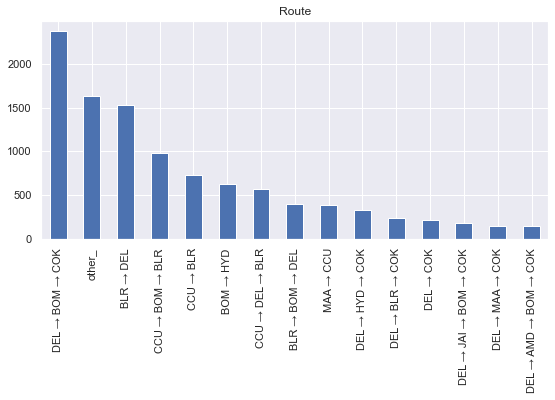

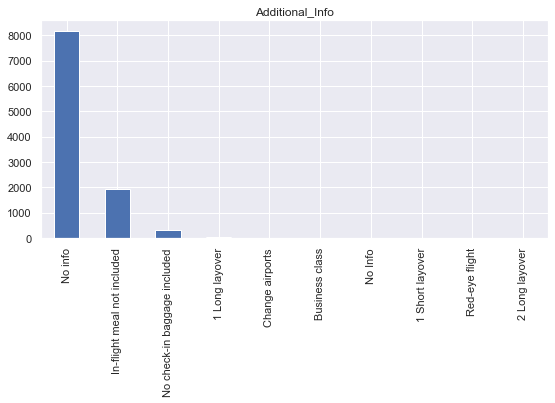

In [77]:
#plotting bar char for each categorical feature
for col in cat_col:
    plt.figure(figsize=(20,4))
    plt.subplot(1,2,1)
    train_data[col].value_counts().plot(kind = 'bar')
    plt.title(col)

### observations
1. Additional Info feature has only two significant no. of observations one being inflight meal not included and other being no check in baggage included.
2. Dlehi >> Bombay >> Cok is the most busiest route.
3. blr >> Del >> Cok is the second adn Ccu >> Bom >> Blr is the thrd most busiest route.
4. Jet airways has the maximum number of flights followed by indigo and air india.
5. Trujet has no flights 
6. Delhi is the highest outgoing traffic of flights followed by Kolkata and Bangalore and Chennai is the least.
7. Cochone has the highest incomming traffic of flights followed by bangalore and delhi and kolkata has the lest traffic.
8. more than 8000 flights have no additional information.
9. Additional Information has only two categories with significant number of observations namely inflight meal not included and no check in baggage included.


### Comparing each Categorical Variable with Price

In [81]:
categorical_features = [feature for feature in train_data.columns if train_data[feature].dtypes=='O']

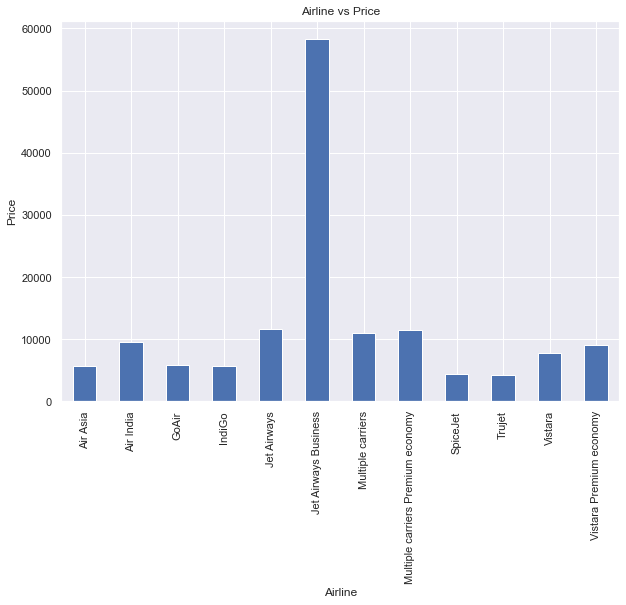

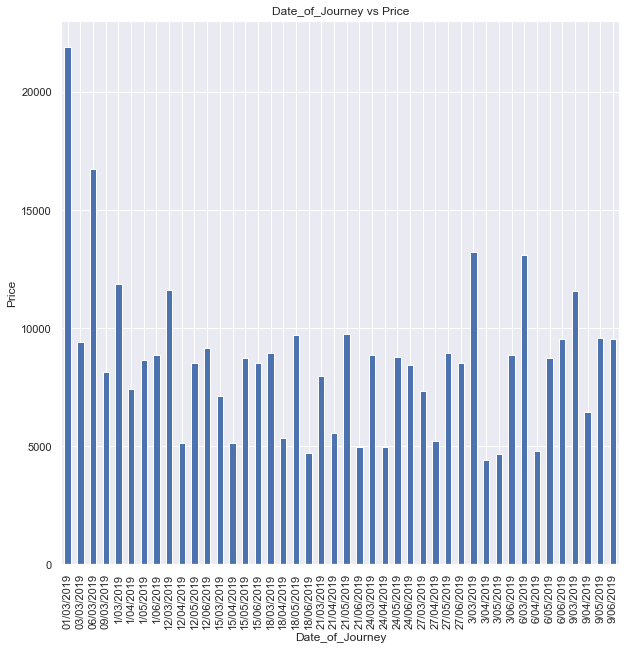

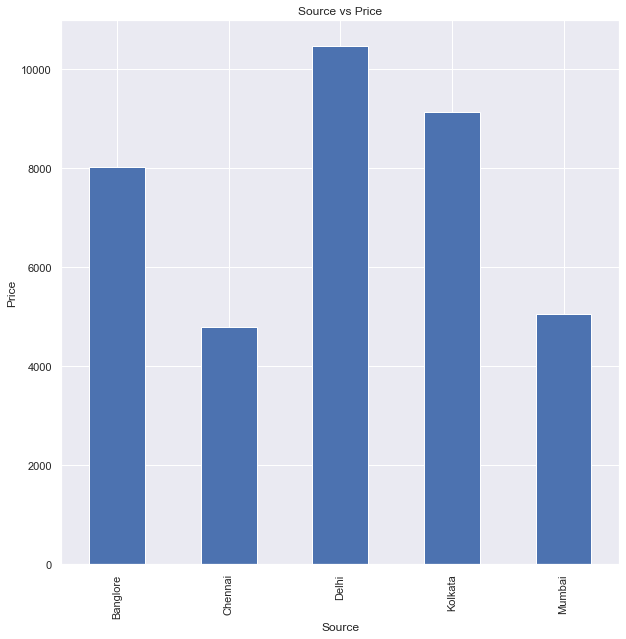

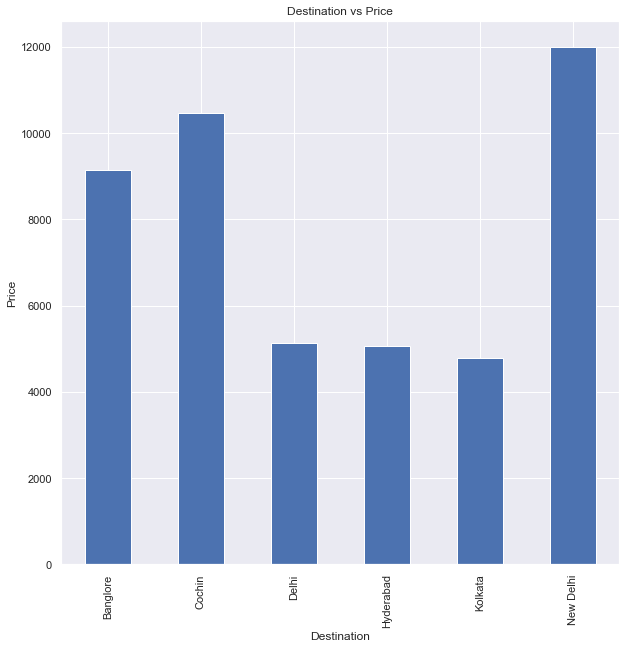

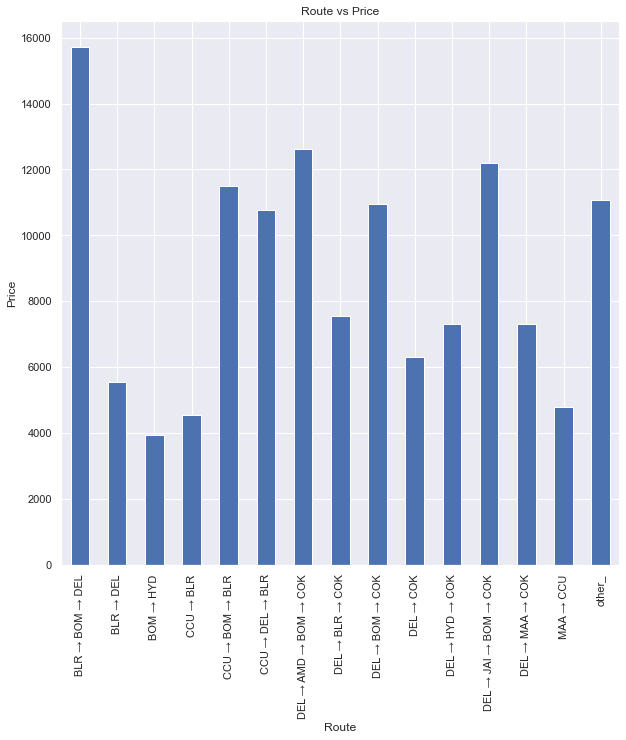

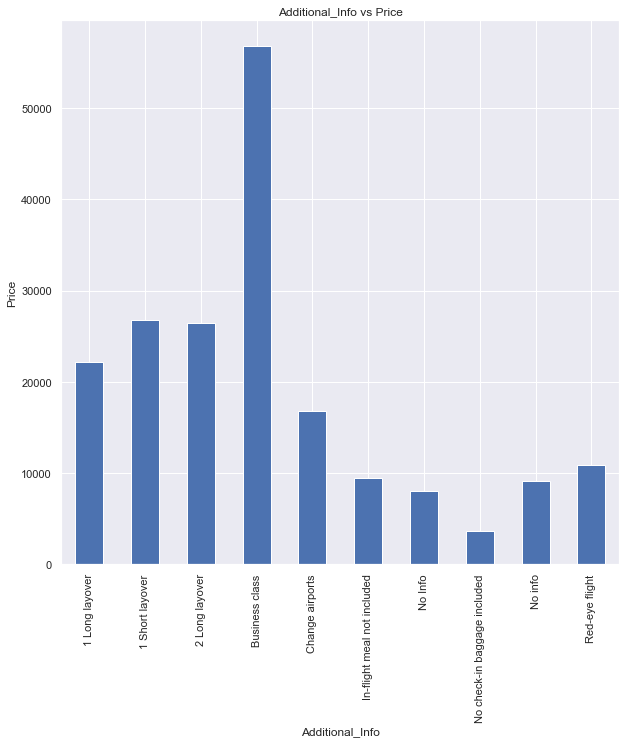

In [83]:
plt.figure(figsize=(10,7))
for feature in categorical_features:
    train_data.groupby(feature)['Price'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.xticks(rotation = 90)
    plt.title("{} vs Price".format(feature))
    plt.show()

### Obersvations
1. Jet Airways Business has highest average flight prices but since no. of observations are less, hence it can be treated as outlier.
2. Jet Airways, Multiple carriers Premium economy, Air India, Vistara Premium economy have an average flight proces around Rs. 10,000.
3. Air Asia, GoAir, Indigo has an average flight prices between 6000 to 7000 INR.
4. SpiceJet and Trujet has least average flight prices all service providers.
5. Multiple carriers Premium economy, Jet Airways Business, Vstara Premium, Trujet has very less number of flights. So can be dropped.
6. Chennai and Mumbai has the least avg flight prices for flights having source in these cities.
7. Delh has the highest average flight prices for flights having source in these cities.
8. New Delhi has the highest avg flight prices followed by Cochin and Bangalore having destination in these cities.
9. Delhi, Hyderabad and Kolkata has the least avg prices for the flights having destination in these cities.
10. blr>>bom>>del route has the highest avg price where as bom>>hyd has the lowest price.
11. Flights with business Class has highest avg price.
12. Flights with long and short layover has the second highest flight price.

### Categorical Features vs Outliers

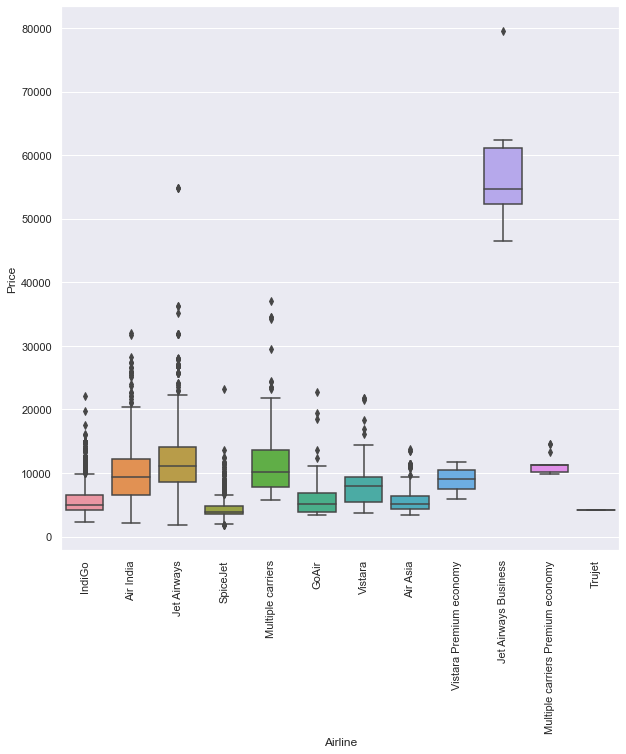

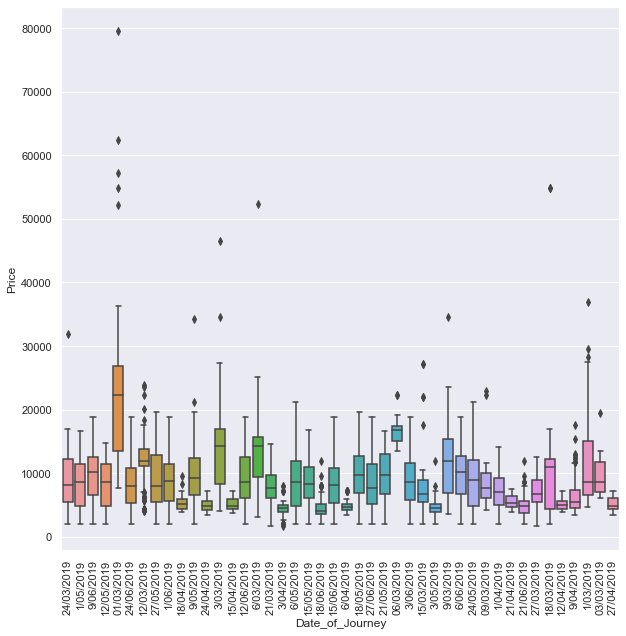

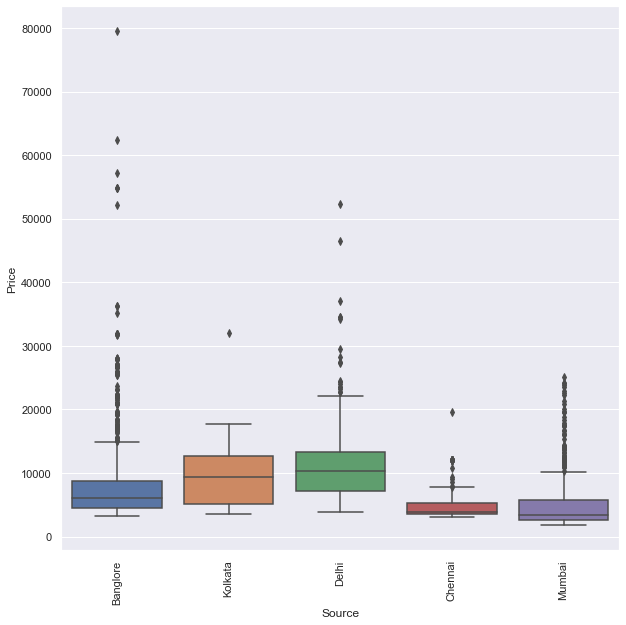

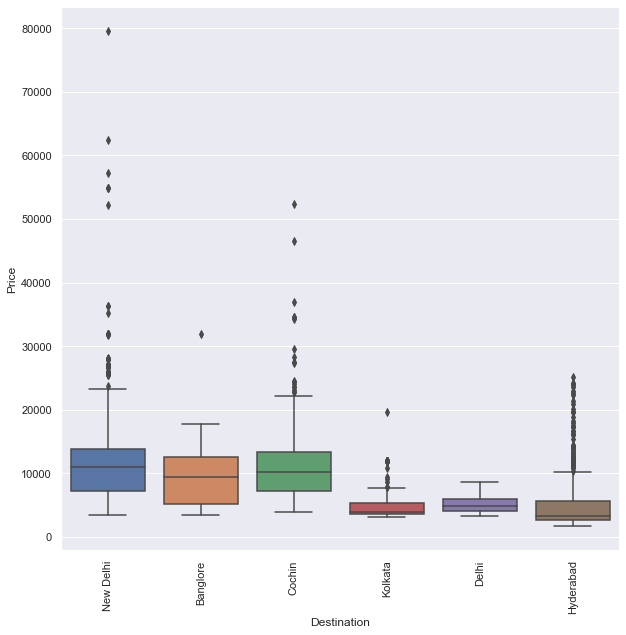

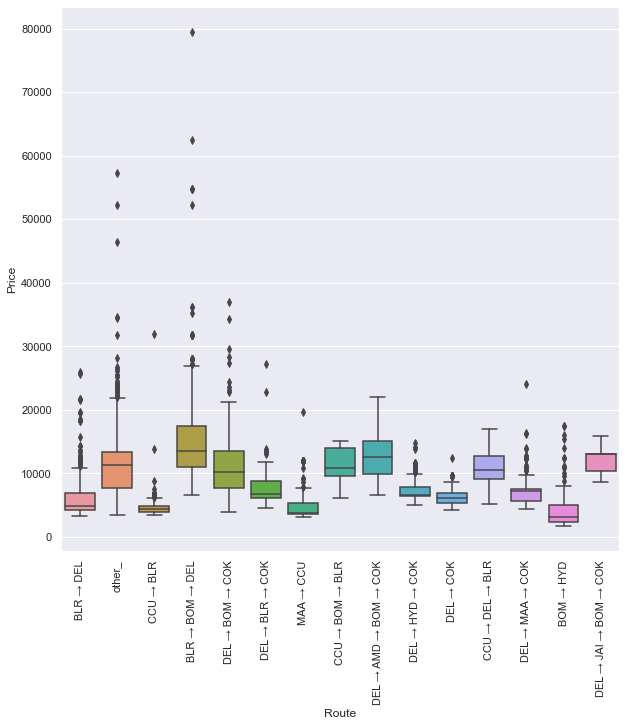

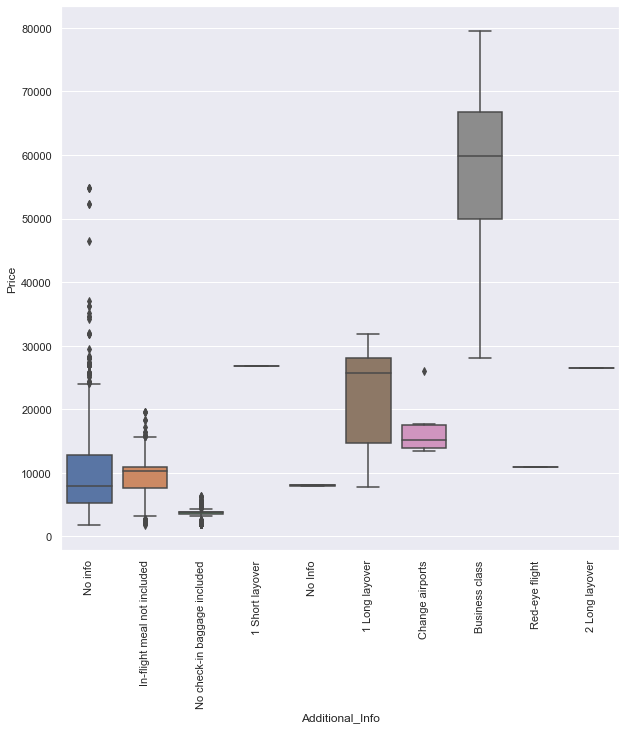

In [85]:
for feature in categorical_features:
    sns.set(rc={'figure.figsize':(10,10)})
    sns.boxplot(x = train_data[feature],y='Price',data = train_data.sort_values('Price',ascending = False))
    plt.xticks(rotation = 90)
    plt.show()

### Observations
1. IndiGo, Air India, Jet Airways, and SpiceJet has large no. of outliers in flight prices.
2. Multiple carriers, GoAir, Vistara has comparatively less no. of outliers in flight prices.
3. Source of flight cities banglore, delhi, chennai and mumbai has large no. of outliers in flight prices whereas kolkata has least no. of outliers in flight prices.
4. Destination of flight cities new delhi, cochin, hyderabad and kolkata has large no. of outliers in flight prices whereas banglore and delhi has least no. of outliers in flight prices.
5. BOM → HYD, DEL → MAA → COK, DEL → BOM → COK, BLR → BOM → DEL, and BLR → DEL routes has large no. of outliers in flight prices whereas DEL → AMD → BOM → COK, MAA → CCU, DEL → JAI → BOM → COK,and CCU → DEL → BLR has zero no. of outliers in flight prices.
6. Additional info categories No check-in baggage included, No info, and In-flight meal not includedhas large no. of outliers in flight prices whereas Business class and 1 Long layover has zero no. of outliers in flight prices.

Airline is a nominal categorical data ie the data is not in any order, so we will perform one hot encoding

In [88]:
Airline = train_data[['Airline']]
Airline = pd.get_dummies(Airline, drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [90]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10462 non-null  object        
 1   Date_of_Journey  10462 non-null  object        
 2   Source           10462 non-null  object        
 3   Destination      10462 non-null  object        
 4   Route            10462 non-null  object        
 5   Dep_Time         10462 non-null  datetime64[ns]
 6   Arrival_Time     10462 non-null  datetime64[ns]
 7   Total_Stops      10462 non-null  int32         
 8   Additional_Info  10462 non-null  object        
 9   Price            10462 non-null  int64         
 10  Total_Duration   10462 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int32(1), int64(1), object(6)
memory usage: 1.2+ MB


In [97]:
# We observe that Data of Journey is object type. we need to convert into date format
train_data['Day of Journey']=pd.to_datetime(train_data['Date_of_Journey'],format = '%d/%m/%Y').dt.day
train_data['Month_of_Journey']=pd.to_datetime(train_data['Date_of_Journey'],format = '%d/%m/%Y').dt.month

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Total_Duration,Day of Journey,Day of Month_of_Journey,Monh_of_Journey,Month_of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2022-11-26 22:20:00,2022-03-22 01:10:00,0,No info,3897,2.833333,24,3,3,3
1,Air India,1/05/2019,Kolkata,Banglore,other_,2022-11-26 05:50:00,2022-11-26 13:15:00,2,No info,7662,7.416667,1,5,5,5
2,Jet Airways,9/06/2019,Delhi,Cochin,other_,2022-11-26 09:25:00,2022-06-10 04:25:00,2,No info,13882,19.000000,9,6,6,6
3,IndiGo,12/05/2019,Kolkata,Banglore,other_,2022-11-26 18:05:00,2022-11-26 23:30:00,1,No info,6218,5.416667,12,5,5,5
4,IndiGo,01/03/2019,Banglore,New Delhi,other_,2022-11-26 16:50:00,2022-11-26 21:35:00,1,No info,13302,4.750000,1,3,3,3


In [101]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Airline           10462 non-null  object        
 1   Date_of_Journey   10462 non-null  object        
 2   Source            10462 non-null  object        
 3   Destination       10462 non-null  object        
 4   Route             10462 non-null  object        
 5   Dep_Time          10462 non-null  datetime64[ns]
 6   Arrival_Time      10462 non-null  datetime64[ns]
 7   Total_Stops       10462 non-null  int32         
 8   Additional_Info   10462 non-null  object        
 9   Price             10462 non-null  int64         
 10  Total_Duration    10462 non-null  float64       
 11  Day of Journey    10462 non-null  int64         
 12  Month_of_Journey  10462 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int32(1), int64(3), object(6)
memory usage

In [103]:
#extracting hour and mins from departure and arrival time features
train_data['Dep_hour']=train_data['Dep_Time'].dt.hour

In [104]:
train_data['Dep_min']=train_data['Dep_Time'].dt.minute
train_data['Arrival_hour']=train_data['Arrival_Time'].dt.hour
train_data['Arrival_min']=train_data['Arrival_Time'].dt.minute

In [106]:
#dropping features which are not required anymore
train_data.drop(['Dep_Time','Arrival_Time','Date_of_Journey'],axis =1,inplace = True)

In [108]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Total_Duration,Day of Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,2.833333,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,other_,2,No info,7662,7.416667,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,other_,2,No info,13882,19.000000,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,other_,1,No info,6218,5.416667,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,other_,1,No info,13302,4.750000,1,3,16,50,21,35


In [113]:
train_data['Source'].value_counts().count()

5

Source column has 5 unique values. As source is nominal categorical data we can perform one hot encoding

In [189]:
Source = train_data[['Source']]
Source = pd.get_dummies(Source,drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [190]:
#permorming one hot encoding on destination feature as well
#Destination = train_data[['Destination']]
#Destination = pd.get_dummies(Destination,drop_first= True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [117]:
#since route and total stops are related to each other
#we will keep total stops and drop route. 
#Also, we will drop additional column 
#as it doesnot contain much information for us.

In [118]:
train_data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [193]:
data_train = pd.concat([train_data, Airline,Source,Destination],axis=1)

In [196]:
data_train.drop(['Airline','Source','Destination'],axis =1,inplace = True)

In [197]:
data_train

,Total_Stops,Price,Total_Duration,Day of Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,3897.0,2.833333,24.0,3.0,22.0,20.0,1.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2.0,7662.0,7.416667,1.0,5.0,5.0,50.0,13.0,15.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,13882.0,19.000000,9.0,6.0,9.0,25.0,4.0,25.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,6218.0,5.416667,12.0,5.0,18.0,5.0,23.0,30.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,13302.0,4.750000,1.0,3.0,16.0,50.0,21.0,35.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0
2093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0
2595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


# analysing testing dataset

In [119]:
#same analysis we will perform on test set

In [120]:
test_df = pd.read_excel('Test_set.xlsx')
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [123]:
test_df.shape

(2671, 10)

In [124]:
test_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [125]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [126]:
test_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [127]:
test_data = test_df.copy()
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [138]:
#removing duplicates
test_data.drop_duplicates(inplace= True)

In [131]:
#dropping null values
test_data.dropna(inplace=True)

In [140]:
#converting into date and time
test_data['Dep_Time']=pd.to_datetime(test_data['Dep_Time'])
test_data['Arrival_Time']=pd.to_datetime(test_data['Arrival_Time'])

In [141]:
test_data['Duration']=test_data['Duration'].str.replace('h','')
test_data['Duration']=test_data['Duration'].str.replace('m','')

In [142]:
#Splitting hours and mins into two columns
test_data[['Duration_hours','Duration_mins']]=test_data.Duration.str.split(" ",expand = True)

In [143]:
#filling 0 in place of missing values
test_data.Duration_mins.fillna(0,inplace = True)

In [144]:
#dropping Duration feature as it is not required anymore
test_data.drop(['Duration'], axis = 1, inplace = True)

In [145]:
#converting the data type
test_data["Duration_hours"]=test_data['Duration_hours'].astype('float')
test_data["Duration_mins"]=test_data['Duration_mins'].astype('float')

In [146]:
#calculation total time taken by the flight
test_data['Total_Duration'] = test_data['Duration_hours']+(test_data['Duration_mins']/60)

In [147]:
#dropping duration hours and mins as they are not required anymore
test_data.drop(['Duration_hours'],axis = 1,inplace= True)
test_data.drop(['Duration_mins'],axis = 1,inplace = True)

In [148]:
test_data['Total_Stops'].replace('non-stop',0, inplace = True)

In [149]:
test_data[['Total_Stops','drop_this']]=test_data.Total_Stops.str.split(' ',expand=True)

In [150]:
test_data.drop(['drop_this'],axis = 1,inplace = True)

In [151]:
test_data['Total_Stops'].fillna(0,inplace=True)

In [152]:
test_data['Total_Stops']=test_data['Total_Stops'].astype('int')

In [153]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2645 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          2645 non-null   object        
 1   Date_of_Journey  2645 non-null   object        
 2   Source           2645 non-null   object        
 3   Destination      2645 non-null   object        
 4   Route            2645 non-null   object        
 5   Dep_Time         2645 non-null   datetime64[ns]
 6   Arrival_Time     2645 non-null   datetime64[ns]
 7   Total_Stops      2645 non-null   int32         
 8   Additional_Info  2645 non-null   object        
 9   Total_Duration   2645 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int32(1), object(6)
memory usage: 217.0+ KB


In [154]:
#Grouping Routes which are less than 1 percent of the total Routes to other category.
frequencies = test_data['Route'].value_counts(normalize = True)
mapping = test_data['Route'].map(frequencies)
test_data['Route']=test_data['Route'].mask(mapping<0.01,'other_')
test_data['Route'].value_counts()

DEL → BOM → COK          620
BLR → DEL                386
other_                   377
CCU → BOM → BLR          253
CCU → BLR                172
BOM → HYD                164
CCU → DEL → BLR          124
BLR → BOM → DEL          107
DEL → HYD → COK           85
MAA → CCU                 75
DEL → JAI → BOM → COK     67
DEL → BLR → COK           55
DEL → COK                 49
DEL → MAA → COK           44
DEL → AMD → BOM → COK     40
CCU → HYD → BLR           27
Name: Route, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'DEL → BOM → COK'),
  Text(1, 0, 'other_'),
  Text(2, 0, 'BLR → DEL'),
  Text(3, 0, 'CCU → HYD → BLR'),
  Text(4, 0, 'CCU → BLR'),
  Text(5, 0, 'CCU → BOM → BLR'),
  Text(6, 0, 'DEL → HYD → COK'),
  Text(7, 0, 'BLR → BOM → DEL'),
  Text(8, 0, 'CCU → DEL → BLR'),
  Text(9, 0, 'DEL → JAI → BOM → COK'),
  Text(10, 0, 'BOM → HYD'),
  Text(11, 0, 'MAA → CCU'),
  Text(12, 0, 'DEL → BLR → COK'),
  Text(13, 0, 'DEL → MAA → COK'),
  Text(14, 0, 'DEL → COK'),
  Text(15, 0, 'DEL → AMD → BOM → COK')])

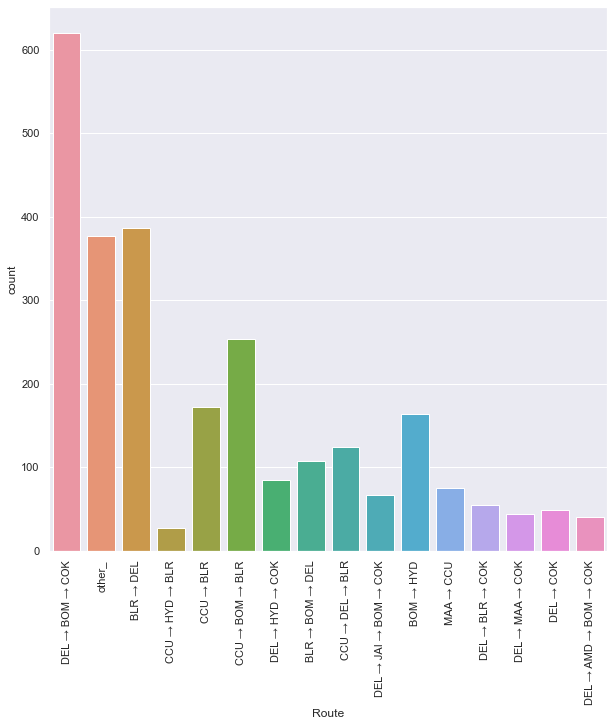

In [155]:
#Visualizing Route feature separately
sns.set(rc={'figure.figsize':(10,10)})
sns.countplot(data=test_data,x = test_data['Route'])
plt.xticks(rotation=90)

In [156]:
#unovariate analysis of categorical data
cat_col = test_data.select_dtypes(include=['object']).columns

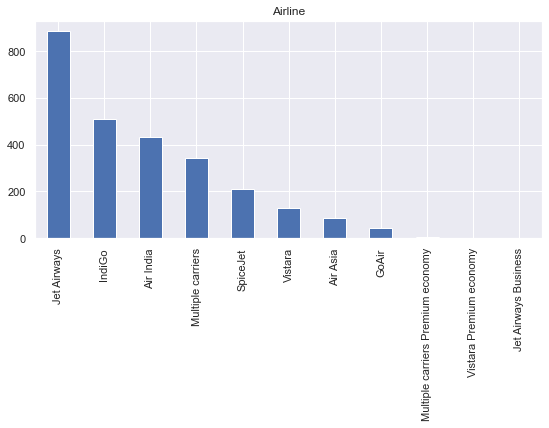

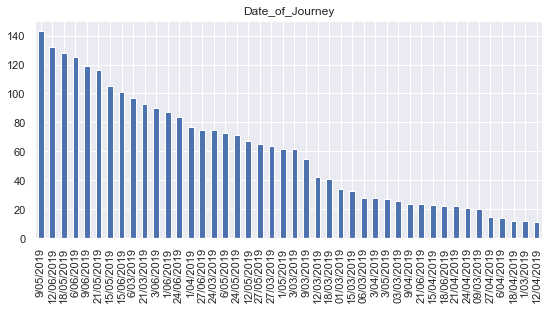

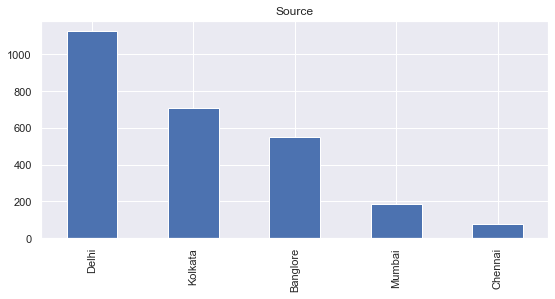

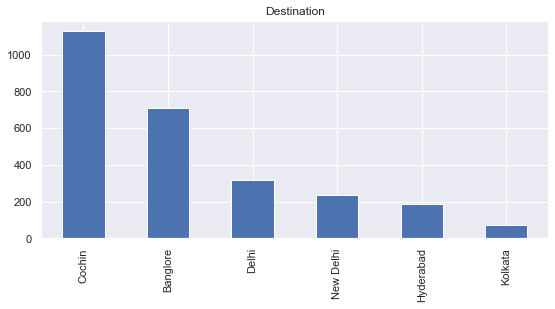

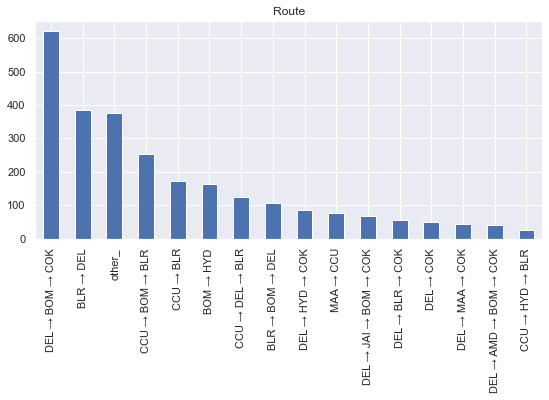

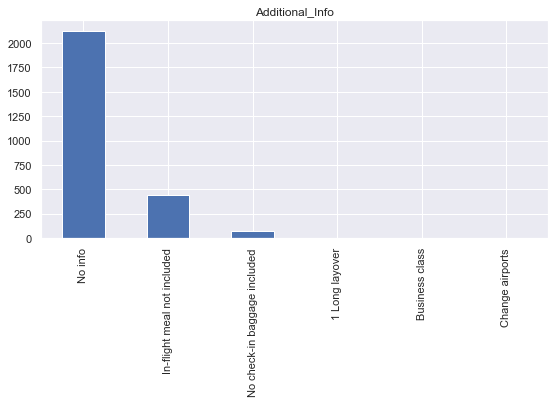

In [157]:
#plotting bar char for each categorical feature
for col in cat_col:
    plt.figure(figsize=(20,4))
    plt.subplot(1,2,1)
    test_data[col].value_counts().plot(kind = 'bar')
    plt.title(col)

In [195]:
Airline1 = test_data[['Airline']]
Airline1 = pd.get_dummies(Airline1, drop_first= True)
Airline1.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [163]:
# We observe that Data of Journey is object type. we need to convert into date format
test_data['Day of Journey']=pd.to_datetime(test_data['Date_of_Journey'],format = '%d/%m/%Y').dt.day
test_data['Month_of_Journey']=pd.to_datetime(test_data['Date_of_Journey'],format = '%d/%m/%Y').dt.month

In [164]:
#extracting hour and mins from departure and arrival time features
test_data['Dep_hour']=test_data['Dep_Time'].dt.hour

In [165]:
test_data['Dep_min']=test_data['Dep_Time'].dt.minute
test_data['Arrival_hour']=test_data['Arrival_Time'].dt.hour
test_data['Arrival_min']=test_data['Arrival_Time'].dt.minute

In [166]:
#dropping features which are not required anymore
test_data.drop(['Dep_Time','Arrival_Time','Date_of_Journey'],axis =1,inplace = True)

In [167]:
test_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Total_Duration,Day of Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,No info,10.916667,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,other_,1,No info,4.000000,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,In-flight meal not included,23.750000,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1,No info,13.000000,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,0,No info,2.833333,24,6,23,55,2,45


In [186]:
Source1 = test_data[['Source']]
Source1 = pd.get_dummies(Source,drop_first= True)
Source1.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [188]:
#permorming one hot encoding on destination feature as well
Destination1 = test_data[['Destination']]
Destination1 = pd.get_dummies(Destination1,drop_first= True)
Destination1.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [199]:
data_test = pd.concat([test_data, Airline1,Source1,Destination1],axis=1)
data_test.drop(['Airline','Source','Destination'],axis =1,inplace = True)

In [200]:
data_test

,Total_Stops,Total_Duration,Day of Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,10.916667,6,6,17,30,4,25,0,0,...,0,0,1,0,0,1,0,0,0,0
1,1,4.000000,12,5,6,20,10,20,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,23.750000,21,5,19,15,19,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,13.000000,21,5,8,0,21,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,2.833333,24,6,23,55,2,45,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,23.916667,6,6,20,30,20,25,1,0,...,0,0,0,1,0,0,0,0,0,0
2667,0,2.583333,27,3,14,20,16,55,0,0,...,0,0,0,1,0,0,0,0,0,0
2668,1,6.583333,6,3,21,50,4,25,0,0,...,0,0,1,0,0,1,0,0,0,0
2669,1,15.250000,6,3,4,0,19,15,1,0,...,0,0,1,0,0,1,0,0,0,0


In [202]:
data_train.shape

(10477, 28)

In [203]:
data_test.shape

(2645, 27)

In [204]:
data_train.isnull().sum()

Total_Stops                                    15
Price                                          15
Total_Duration                                 15
Day of Journey                                 15
Month_of_Journey                               15
Dep_hour                                       15
Dep_min                                        15
Arrival_hour                                   15
Arrival_min                                    15
Airline_Air India                            7832
Airline_GoAir                                7832
Airline_IndiGo                               7832
Airline_Jet Airways                          7832
Airline_Jet Airways Business                 7832
Airline_Multiple carriers                    7832
Airline_Multiple carriers Premium economy    7832
Airline_SpiceJet                             7832
Airline_Vistara                              7832
Airline_Vistara Premium economy              7832
Source_Chennai                                 15


In [207]:
data_train.fillna(0)

,Total_Stops,Price,Total_Duration,Day of Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,3897.0,2.833333,24.0,3.0,22.0,20.0,1.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2.0,7662.0,7.416667,1.0,5.0,5.0,50.0,13.0,15.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,13882.0,19.000000,9.0,6.0,9.0,25.0,4.0,25.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,6218.0,5.416667,12.0,5.0,18.0,5.0,23.0,30.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,13302.0,4.750000,1.0,3.0,16.0,50.0,21.0,35.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2093,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2548,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2595,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [206]:
data_test.isnull().sum()

Total_Stops                                  0
Total_Duration                               0
Day of Journey                               0
Month_of_Journey                             0
Dep_hour                                     0
Dep_min                                      0
Arrival_hour                                 0
Arrival_min                                  0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chennai                               0
Source_Delhi                                 0
Source_Kolkata                               0
Source_Mumbai

In [216]:
data_train

,Total_Stops,Price,Total_Duration,Day of Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,3897.0,2.833333,24.0,3.0,22.0,20.0,1.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2.0,7662.0,7.416667,1.0,5.0,5.0,50.0,13.0,15.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,13882.0,19.000000,9.0,6.0,9.0,25.0,4.0,25.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,6218.0,5.416667,12.0,5.0,18.0,5.0,23.0,30.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,13302.0,4.750000,1.0,3.0,16.0,50.0,21.0,35.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0
1704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0
1891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0


### Feature Selection

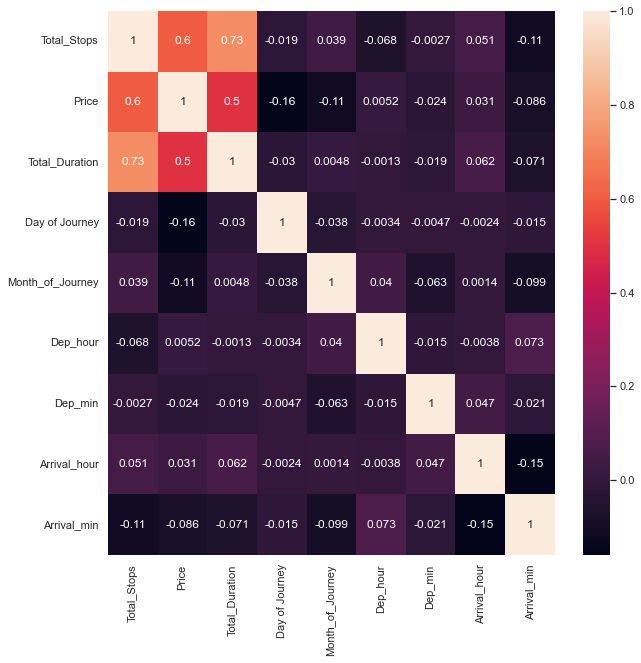

In [218]:
#finding correlation between dependent and independent attributes
plt.figure(figsize = (10,10))
sns.heatmap(train_data.corr(),annot = True)
plt.show()

### Observations
1. As the total number of stops increase, the duration of the flight increase and hence has positve effect on the flight.

In [220]:
data_train.drop(['Price'],axis = 1, inplace = True)

In [222]:
X=data_train

In [ ]:
y = data_train.iloc[:,1]

In [233]:
y.fillna(0,inplace = True)
y

0        3897.0
1        7662.0
2       13882.0
3        6218.0
4       13302.0
         ...   
1685        0.0
1704        0.0
1891        0.0
1982        0.0
2595        0.0
Name: Price, Length: 10471, dtype: float64

In [234]:
X.fillna(0,inplace = True)

In [235]:
X

,Total_Stops,Total_Duration,Day of Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,2.833333,24.0,3.0,22.0,20.0,1.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2.0,7.416667,1.0,5.0,5.0,50.0,13.0,15.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,19.000000,9.0,6.0,9.0,25.0,4.0,25.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,5.416667,12.0,5.0,18.0,5.0,23.0,30.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,4.750000,1.0,3.0,16.0,50.0,21.0,35.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1704,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1891,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1982,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### extra tree regressor model

In [236]:
from sklearn.ensemble import ExtraTreesRegressor

In [237]:
selection = ExtraTreesRegressor()

In [238]:
selection.fit(X,y)

ExtraTreesRegressor()

In [240]:
print(selection.feature_importances_)

[2.48198046e-01 2.15041713e-01 1.41936356e-01 7.77056714e-02
 4.83542317e-02 5.34773983e-02 5.88395113e-02 5.19729389e-02
 5.92926832e-03 1.24583095e-03 4.19819959e-03 7.37548034e-03
 9.67858225e-06 3.83114882e-03 1.00908653e-05 2.45075888e-03
 1.02202633e-03 0.00000000e+00 1.69062119e-03 3.48568955e-02
 2.20973359e-02 5.45293139e-03 5.63458764e-03 3.45341417e-03
 1.99810044e-03 1.01917165e-03 2.19859280e-03]


In [241]:
#observation: we observe that total_stops is highly deciding factor.

In [242]:
from sklearn.model_selection import train_test_split

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

In [244]:
from sklearn.ensemble import RandomForestRegressor

In [245]:
reg_rf = RandomForestRegressor()

In [246]:
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [247]:
y_pred = reg_rf.predict(X_test)

In [249]:
reg_rf.score(X_train,y_train)

0.9532909362986012

In [250]:
reg_rf.score(X_test,y_test)

0.7001748410953026

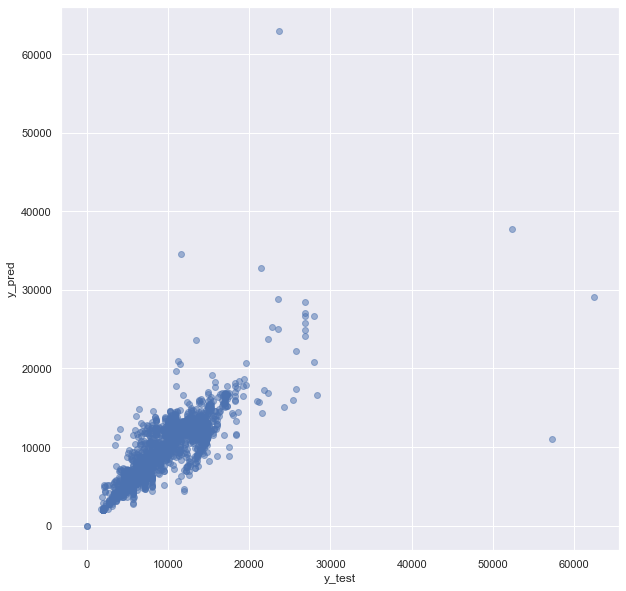

In [253]:
plt.scatter(y_test,y_pred,alpha = 0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [255]:
from sklearn import metrics

## Checking accuracy of the Model

In [256]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 1315.956252482548
Mean Squared Error: 6465264.853780284
Root Mean Squared Error: 2542.6885089959965


In [258]:
import pickle
file = open('flight_fare_prediction_with_rand_forest.pkl','wb')
pickle.dump(reg_rf,file)

In [259]:
model = open('flight_fare_prediction_with_rand_forest.pkl','rb')

In [260]:
forest = pickle.load(model)

In [261]:
y_predition = forest.predict(X_test)

In [263]:
metrics.r2_score(y_test,y_pred)

0.7001748410953026